In [1]:
# Import required libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
#Github: https://github.com/sujitmandal

#This programe is create by Sujit Mandal

"""
Github: https://github.com/sujitmandal
This programe is create by Sujit Mandal

LinkedIn : https://www.linkedin.com/in/sujit-mandal-91215013a/

Facebook : https://www.facebook.com/sujit.mandal.33671748

Twitter : https://twitter.com/mandalsujit37
"""

'\nGithub: https://github.com/sujitmandal\nThis programe is create by Sujit Mandal\n\nLinkedIn : https://www.linkedin.com/in/sujit-mandal-91215013a/\n\nFacebook : https://www.facebook.com/sujit.mandal.33671748\n\nTwitter : https://twitter.com/mandalsujit37\n'

In [3]:
data = pd.read_csv('iris.csv')
print(data.head(5))
print('\n')
print(data.tail(5))
print('\n')
print(data.shape)

   sepal.length  sepal.width  petal.length  petal.width  variety
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


     sepal.length  sepal.width  petal.length  petal.width  variety
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2


(150, 5)


In [4]:
class_names = ['Setosa', 'Versicolor', 'Virginica']

In [5]:
transpose = data.describe().transpose()
print(transpose)

              count      mean       std  min  25%   50%  75%  max
sepal.length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal.width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal.length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal.width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
variety       150.0  1.000000  0.819232  0.0  0.0  1.00  2.0  2.0


In [6]:
target_column = ['variety']
predictors = list(set(list(data.columns)) - set(target_column)) 
data[predictors] = data[predictors] / data[predictors].max()
predictors_transpose = data.describe().transpose()
print(predictors_transpose)

              count      mean       std       min       25%       50%  \
sepal.length  150.0  0.739662  0.104818  0.544304  0.645570  0.734177   
sepal.width   150.0  0.694848  0.099061  0.454545  0.636364  0.681818   
petal.length  150.0  0.544638  0.255840  0.144928  0.231884  0.630435   
petal.width   150.0  0.479733  0.304895  0.040000  0.120000  0.520000   
variety       150.0  1.000000  0.819232  0.000000  0.000000  1.000000   

                   75%  max  
sepal.length  0.810127  1.0  
sepal.width   0.750000  1.0  
petal.length  0.739130  1.0  
petal.width   0.720000  1.0  
variety       2.000000  2.0  


In [7]:
#Creating the Training and Test Datasets

x = data[predictors].values
y = data[target_column].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)

print(x_train.shape)
print(x_test.shape)

(105, 4)
(45, 4)


In [10]:
neighbors = int(input('Enter The Number of Neighbors : '))
knn = KNeighborsClassifier(n_neighbors= neighbors)
knn.fit(x_train, y_train)

predict_train = knn.predict(x_train)
predict_test = knn.predict(x_test)

Enter The Number of Neighbors : 5


/home/sujit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
predicted = knn.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

accuracyInpercentage = (accuracy * 100)
print('Accuracy :', accuracyInpercentage)

Accuracy : 100.0




Confusion matrix, without normalization
[[16  0  0]
 [ 0 14  0]
 [ 0  0 15]]


Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


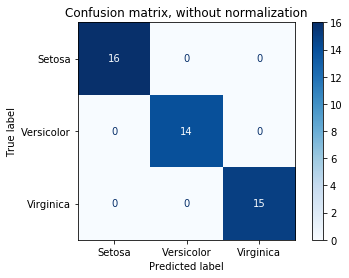

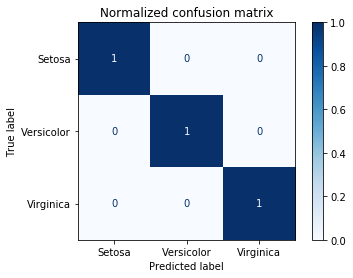

In [12]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print('\n')
    print(title)
    print(disp.confusion_matrix)

#plt.show()

In [13]:
print('\n')
print('Classification Report:')
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train, target_names=class_names))



Classification Report:
[[34  0  0]
 [ 0 36  0]
 [ 0  2 33]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        34
  Versicolor       0.95      1.00      0.97        36
   Virginica       1.00      0.94      0.97        35

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

